# File handling tools

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [2]:
import os
import sys
sys.path.append("../")
from py.config import cfg
import py.logs as logs
import py.vidRead as vr
import py.vidMorph as vm
from py.imshow import imshow
LOGGERDEFINED = logs.openLog('fileHandling.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

In [3]:
import cv2 as cv
import numpy as np
import imutils
import random as rng

In [4]:
import pandas as pd

In [32]:
t = vr.Test(os.path.join(cfg.path.vids, '210616 mineralS LapRDT', 'M4S_3.50T_p4'))

In [33]:
t.prnt()

Droplet: {'name': 'M4S', 'base': 'mineral oil', 'rheModifier': 'fumed silica', 'surfactant': 'Span 20', 'rheWt': 4.0, 'tau0': 0.18871, 'k': 0.640731304, 'n': 0.511230738, 'eta0': 2.35373}
Matrix: {'name': '3.50T', 'base': 'water', 'rheModifier': 'Laponite RD', 'surfactant': 'Tween 80', 'rheWt': 3.5, 'tau0': 2.74744, 'k': 34.01372334, 'n': 0.041790735, 'eta0': 30.5617}
Profile:
     mode  gap strain rate freq direction time
0   stdy  500    n/a    1  n/a        cw    8
1   stdy  500    n/a    2  n/a       acw    6
2   stdy  500    n/a    3  n/a        cw    4
3   stdy  500    n/a    4  n/a       acw    3
4   stdy  500    n/a    5  n/a        cw    2
5   stdy  500    n/a    6  n/a       acw    2
6   stdy  500    n/a    8  n/a        cw    2
7   stdy  500    n/a   10  n/a       acw    2
8   stdy  500    n/a   12  n/a        cw    2
9   stdy  500    n/a   16  n/a       acw    1
10  stdy  500    n/a   20  n/a        cw    1
11  stdy  500    n/a   30  n/a       acw    1
12  stdy  500    n/a 

In [52]:
vi = vr.vidInfo(1, t)
vi.analyze()

INFO: Analyzing frame 1
INFO: Analyzing frame 101
INFO: Analyzing frame 201
INFO: Analyzing frame 301
INFO: Analyzing frame 401
INFO: Analyzing frame 501
INFO: Analyzing frame 601
INFO: Analyzing frame 701
INFO: Analyzing frame 801
INFO: Analyzing frame 901
INFO: Analyzing frame 1001
INFO: Analyzing frame 1101
INFO: Consolidating droplets
INFO: Determining baseline
INFO: Splitting times
INFO: Summarizing droplets


TypeError: unsupported operand type(s) for /: 'str' and 'float'

In [68]:
vi.summarizeDroplets()

In [102]:
vi.getSigma(plot=True)

AttributeError: 'vidInfo' object has no attribute 'summaryPlot'

In [146]:
vi.summary

,dropNum,gdot,gdotHz,etad,etam,lam,k,w,l,r0,grem,D,gr,Dte,g2,rzr0r0,gem,srrrk
0,0.0,1.0,0.159155,2.353730,30.561700,0.077016,0.779162,0.000646,0.000771,0.000346,0.001682,0.088554,0.000055,0.002859,0.025330,-5.561641e+05,30.561700,844.865284
1,0.0,2.0,0.318310,1.714010,30.561700,0.056084,0.759385,0.000658,0.000782,0.000346,0.003364,0.086496,0.000110,0.002802,0.101321,-4.119803e+05,61.123400,736.558334
2,0.0,3.0,0.477465,1.314834,30.561700,0.043022,0.746673,0.000641,0.000836,0.000346,0.005047,0.132604,0.000165,0.004306,0.227973,-6.177569e+05,91.685100,909.585378
3,0.0,4.0,0.636620,1.095400,30.561700,0.035842,0.739560,0.000643,0.000828,0.000346,0.006729,0.126212,0.000220,0.004103,0.405285,-5.912104e+05,122.246800,894.096638
4,0.0,5.0,0.795775,0.953558,30.561700,0.031201,0.734913,0.000626,0.000885,0.000346,0.008411,0.171437,0.000275,0.005578,0.633257,-7.918096e+05,152.808500,1037.988397
5,0.0,6.0,0.954930,0.852955,30.561700,0.027909,0.731593,0.000629,0.000862,0.000346,0.010093,0.156757,0.000330,0.005103,0.911891,-7.610788e+05,183.370200,1019.952430
6,0.0,8.0,1.273240,0.717588,29.143201,0.024623,0.728260,0.000608,0.000962,0.000346,0.012833,0.225423,0.000440,0.007700,1.621139,-1.008837e+06,233.145610,1176.975079
7,0.0,10.0,1.591549,0.629113,23.516821,0.026752,0.730421,0.000603,0.000964,0.000346,0.012944,0.230775,0.000550,0.009765,2.533030,-1.074544e+06,235.168206,1212.900891
8,0.0,12.0,1.909859,0.565824,19.736237,0.028669,0.732361,0.000579,0.001059,0.000346,0.013036,0.292903,0.000661,0.014764,3.647563,-1.360482e+06,236.834846,1362.961678
9,0.0,16.0,2.546479,0.479862,14.968161,0.032059,0.735774,0.000554,0.001139,0.000346,0.013182,0.345610,0.000881,0.022956,6.484556,-1.667005e+06,239.490573,1505.206420


In [149]:
vi.summarizeDroplets()

In [154]:
vi.summaryUnits

{'dropNum': '',
 'gdot': 'rad/s',
 'gdotHz': '1/s',
 'etad': 'Pa.s',
 'etam': 'Pa.s',
 'lam': '',
 'k': '',
 'w': 'm',
 'l': 'm',
 'r0': 'm',
 'grem': 'N/m',
 'D': '',
 'gr': 'm/s',
 'Dte': 'm^2/(N*s)',
 'g2': '1/s^2',
 'rzr0r0': '1/m^2',
 'gem': 'N/m^2',
 'srrrk': '1/m'}

In [160]:
vi.dropletTabUnits

{'frame': '',
 'time': 's',
 'dropNum': '',
 'x': 'px',
 'y': 'px',
 'dpos': 'px',
 'v': 'px/s',
 'w': 'px',
 'l': 'px',
 'angle': 'degree'}

In [158]:
col = pd.MultiIndex.from_tuples([(k,v) for k, v in vi.summaryUnits.items()])
data = np.array(vi.summary)
df = pd.DataFrame(data, columns=col)
df

,dropNum,gdot,gdotHz,etad,etam,lam,k,w,l,r0,grem,D,gr,Dte,g2,rzr0r0,gem,srrrk
,,rad/s,1/s,Pa.s,Pa.s,,,m,m,m,N/m,,m/s,m^2/(N*s),1/s^2,1/m^2,N/m^2,1/m
0,0.0,1.0,0.159155,2.353730,30.561700,0.077016,0.779162,0.000646,0.000771,0.000346,0.001682,0.088554,0.000055,0.002859,0.025330,-5.561641e+05,30.561700,844.865284
1,0.0,2.0,0.318310,1.714010,30.561700,0.056084,0.759385,0.000658,0.000782,0.000346,0.003364,0.086496,0.000110,0.002802,0.101321,-4.119803e+05,61.123400,736.558334
2,0.0,3.0,0.477465,1.314834,30.561700,0.043022,0.746673,0.000641,0.000836,0.000346,0.005047,0.132604,0.000165,0.004306,0.227973,-6.177569e+05,91.685100,909.585378
3,0.0,4.0,0.636620,1.095400,30.561700,0.035842,0.739560,0.000643,0.000828,0.000346,0.006729,0.126212,0.000220,0.004103,0.405285,-5.912104e+05,122.246800,894.096638
4,0.0,5.0,0.795775,0.953558,30.561700,0.031201,0.734913,0.000626,0.000885,0.000346,0.008411,0.171437,0.000275,0.005578,0.633257,-7.918096e+05,152.808500,1037.988397
5,0.0,6.0,0.954930,0.852955,30.561700,0.027909,0.731593,0.000629,0.000862,0.000346,0.010093,0.156757,0.000330,0.005103,0.911891,-7.610788e+05,183.370200,1019.952430
6,0.0,8.0,1.273240,0.717588,29.143201,0.024623,0.728260,0.000608,0.000962,0.000346,0.012833,0.225423,0.000440,0.007700,1.621139,-1.008837e+06,233.145610,1176.975079
7,0.0,10.0,1.591549,0.629113,23.516821,0.026752,0.730421,0.000603,0.000964,0.000346,0.012944,0.230775,0.000550,0.009765,2.533030,-1.074544e+06,235.168206,1212.900891
8,0.0,12.0,1.909859,0.565824,19.736237,0.028669,0.732361,0.000579,0.001059,0.000346,0.013036,0.292903,0.000661,0.014764,3.647563,-1.360482e+06,236.834846,1362.961678


In [164]:
vi.exportAll()

In [134]:
vi.fits

{1: {'mode': 1,
  'sigma': 0.04043836668645584,
  'slope': 24.728990855482138,
  'r2': 0.8169683081518886},
 2: {'mode': 2,
  'sigma': 0.0346181506894156,
  'slope': 29.098056308487784,
  'r2': 0.678131904135829},
 3: {'mode': 3,
  'sigma': 0.23290384222256794,
  'slope': 4.293617445110152,
  'r2': 0.49165118850505407},
 4: {'mode': 4,
  'sigma': 0.08683487177607165,
  'slope': -26086.10883134639,
  'r2': 0.5891343761032297}}

In [142]:
vi.exportAll()

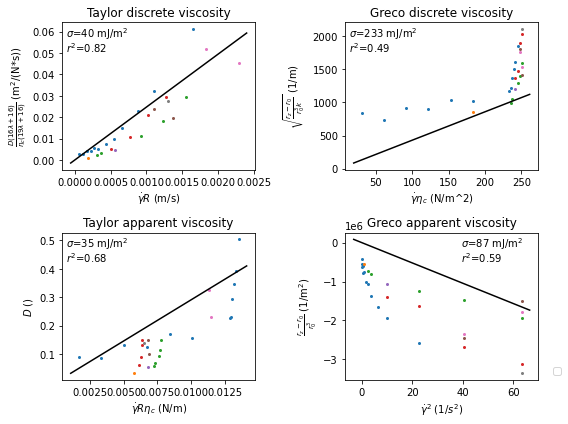

In [129]:
vi.plotSummaries()

In [127]:
vi.consolidateDroplets()

In [424]:
vi.baselineDroplets()
vi.baselines

,dropNum,w,l,r0,w2,l2,r02
0,0.0,141.750687,182.180578,77.058546,146.749176,156.633911,74.986379
1,3.0,86.047191,91.745379,43.953069,86.037552,91.115593,43.848991
2,6.0,84.088496,91.931814,43.312808,84.962090,88.755898,43.104161
3,10.0,68.706259,77.185958,35.711956,69.467278,73.539551,35.399504
4,11.0,76.188250,83.520036,39.278862,76.404121,82.215469,39.147050
5,14.0,73.703739,84.276955,38.535940,74.987320,82.513992,38.708329
6,16.0,107.269958,182.388685,64.015927,114.895241,158.122086,63.900199
7,17.0,66.110260,87.442139,36.284642,66.110260,87.442139,36.284642


[((750.2714233398438, 827.2903442382812),
  (107.28846740722656, 321.618896484375),
  177.87094116210938)]

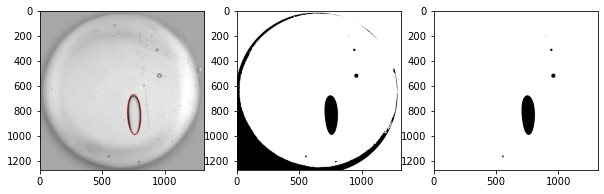

In [334]:
vi.detectDropletOneFrame(frameNum=983, diag=True)

[((695.17138671875, 283.0589294433594),
  (142.07586669921875, 180.76345825195312),
  170.71881103515625)]

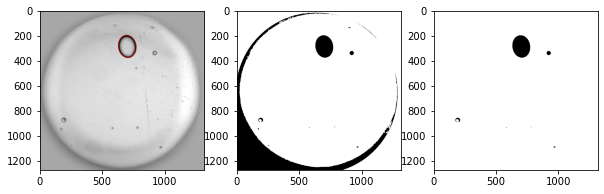

In [354]:
vi.detectDropletOneFrame(frameNum=1, diag=True)

In [43]:
vi.moveTimes

NameError: name 'vi' is not defined

In [48]:
0.0005*(2*np.pi)/700

[autoreload of py.vidRead failed: Traceback (most recent call last):
  File "C:\Users\lmf1\Miniconda3\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\lmf1\Miniconda3\lib\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "C:\Users\lmf1\Miniconda3\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\lmf1\Miniconda3\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "..\py\vidRead.py", line 680
    measurements.append({'dr

4.487989505128276e-06